In [1]:
import newsgroups
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Load and preprocess data

In [2]:
data = newsgroups.load()

In [3]:
data

,text,group
0,morgan and guzman will have era's 1 run higher...,rec.sport.baseball
1,"Well, I just got my Centris 610 yesterday. It...",comp.sys.mac.hardware
2,History and classical methods. Modern methods....,sci.crypt
3,ATTENTION: Mac Quadra owners: Many storage ind...,comp.sys.mac.hardware
4,To show that the examples I and others have pr...,alt.atheism
...,...,...
18841,Why are circuit boards green? The material us...,sci.electronics
18842,bike. Luckily the guy stops a foot behind my ...,rec.motorcycles
18843,We were told that the resolution on the 5FGe c...,comp.sys.mac.hardware
18844,CAD Setup For Sale: G486PLB Local Bus Motherbo...,misc.forsale


# Split all data into train and test set

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.group)

In [5]:
print(f"Train set shape: {train.shape}")
print(f"Train set shape: {test.shape}")

Train set shape: (15076, 2)
Train set shape: (3770, 2)


#### Train group values ount

In [6]:
train.group.value_counts()

rec.sport.hockey            799
soc.religion.christian      798
rec.motorcycles             797
rec.sport.baseball          795
sci.crypt                   793
sci.med                     792
rec.autos                   792
comp.windows.x              790
sci.space                   790
comp.os.ms-windows.misc     788
sci.electronics             787
comp.sys.ibm.pc.hardware    786
misc.forsale                780
comp.graphics               778
comp.sys.mac.hardware       770
talk.politics.mideast       752
talk.politics.guns          728
alt.atheism                 639
talk.politics.misc          620
talk.religion.misc          502
Name: group, dtype: int64

#### Test group values count

In [7]:
test.group.value_counts()

rec.sport.hockey            200
soc.religion.christian      199
rec.sport.baseball          199
rec.motorcycles             199
rec.autos                   198
comp.windows.x              198
sci.med                     198
sci.crypt                   198
comp.os.ms-windows.misc     197
sci.electronics             197
sci.space                   197
comp.sys.ibm.pc.hardware    196
comp.graphics               195
misc.forsale                195
comp.sys.mac.hardware       193
talk.politics.mideast       188
talk.politics.guns          182
alt.atheism                 160
talk.politics.misc          155
talk.religion.misc          126
Name: group, dtype: int64

# Tf-Idf text encoding

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000).fit(train.text)
len(tfidf.vocabulary_)

10000

In [9]:
X_train = tfidf.transform(train.text).toarray()
print('X_train shape: %s' % (X_train.shape,))

X_test = tfidf.transform(test.text).toarray()
print('X_test shape: %s' % (X_test.shape,))

X_train shape: (15076, 10000)
X_test shape: (3770, 10000)


# Labels encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(train.group)

#### Known labels

In [11]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

#### Convert labels using encoder:

In [12]:
Y_train = label_encoder.transform(train.group)
print('Y_train shape: %s' % (Y_train.shape,))

Y_test = label_encoder.transform(test.group)
print('Y_test shape: %s' % (Y_test.shape,))

Y_train shape: (15076,)
Y_test shape: (3770,)


# Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, Y_train)

#### Test report

In [14]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, clf.predict(X_test), target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.58      0.67       160
           comp.graphics       0.72      0.79      0.76       195
 comp.os.ms-windows.misc       0.77      0.77      0.77       197
comp.sys.ibm.pc.hardware       0.69      0.79      0.73       196
   comp.sys.mac.hardware       0.85      0.77      0.81       193
          comp.windows.x       0.84      0.82      0.83       198
            misc.forsale       0.89      0.75      0.81       195
               rec.autos       0.87      0.86      0.86       198
         rec.motorcycles       0.88      0.90      0.89       199
      rec.sport.baseball       0.95      0.95      0.95       199
        rec.sport.hockey       0.93      0.93      0.93       200
               sci.crypt       0.85      0.91      0.88       198
         sci.electronics       0.82      0.77      0.79       197
                 sci.med       0.94      0.88      0.91       198
         

#### Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix


cm = pd.DataFrame(data = confusion_matrix(Y_test, clf.predict(X_test)), 
                  index = label_encoder.classes_, 
                  columns= label_encoder.classes_)
cm

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,93,1,0,0,1,0,0,0,2,0,0,0,0,0,0,50,7,6,0,0
comp.graphics,0,155,7,7,2,10,1,1,2,0,2,4,1,1,1,1,0,0,0,0
comp.os.ms-windows.misc,1,9,151,18,2,9,1,1,1,0,0,2,1,0,1,0,0,0,0,0
comp.sys.ibm.pc.hardware,0,5,13,154,9,3,3,1,1,0,1,1,5,0,0,0,0,0,0,0
comp.sys.mac.hardware,0,3,6,18,148,1,2,1,0,1,1,3,8,0,0,1,0,0,0,0
comp.windows.x,0,16,3,7,0,163,0,1,0,0,1,2,1,0,3,1,0,0,0,0
misc.forsale,0,1,1,12,5,1,147,4,6,0,4,5,6,0,2,1,0,0,0,0
rec.autos,0,1,2,1,0,1,3,170,6,1,1,0,2,3,0,4,3,0,0,0
rec.motorcycles,0,3,0,0,0,0,1,7,180,0,0,0,1,0,2,3,2,0,0,0
rec.sport.baseball,0,0,2,0,0,0,1,0,1,190,3,0,0,0,0,0,1,0,1,0


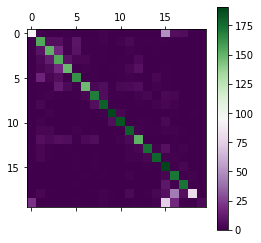

In [16]:
plt.matshow(cm, cmap=plt.cm.PRGn)
plt.colorbar()

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, clf.predict(X_test))

0.806631299734748

# Custom Neural Network

#### OneHot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_train_encoded.shape

(15076, 20)

#### Training

In [21]:
from NeuralNetwork import NeuralNet
cls = NeuralNet(hidden_layer_sizes=(50, ), normalize=True, learning_rate=0.5, max_iter=50, batch_size=4096, momentum=0.9)

0-th iteration: 0.11923850670989465
10-th iteration: 0.017034511637234486
20-th iteration: 0.010218847351465405
30-th iteration: 0.00776893641702035
40-th iteration: 0.005465415773549737


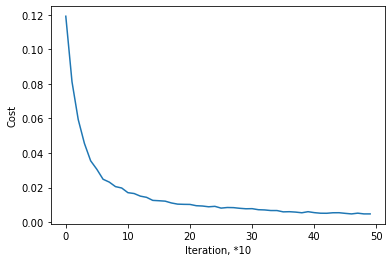

Wall time: 1min 29s


In [22]:
%%time
cls.fit(X_train, Y_train_encoded, print_cost=True, print_by=10)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, cls.predict(X_test), target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.79      0.81       160
           comp.graphics       0.80      0.82      0.81       195
 comp.os.ms-windows.misc       0.84      0.84      0.84       197
comp.sys.ibm.pc.hardware       0.77      0.80      0.79       196
   comp.sys.mac.hardware       0.83      0.83      0.83       193
          comp.windows.x       0.86      0.86      0.86       198
            misc.forsale       0.84      0.85      0.85       195
               rec.autos       0.87      0.89      0.88       198
         rec.motorcycles       0.92      0.92      0.92       199
      rec.sport.baseball       0.96      0.95      0.96       199
        rec.sport.hockey       0.97      0.92      0.95       200
               sci.crypt       0.96      0.91      0.94       198
         sci.electronics       0.82      0.83      0.82       197
                 sci.med       0.92      0.88      0.90       198
         

In [24]:
from sklearn.metrics import confusion_matrix


cm = pd.DataFrame(data = confusion_matrix(Y_test, clf.predict(X_test)), 
                  index = label_encoder.classes_, 
                  columns= label_encoder.classes_)
cm

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,93,1,0,0,1,0,0,0,2,0,0,0,0,0,0,50,7,6,0,0
comp.graphics,0,155,7,7,2,10,1,1,2,0,2,4,1,1,1,1,0,0,0,0
comp.os.ms-windows.misc,1,9,151,18,2,9,1,1,1,0,0,2,1,0,1,0,0,0,0,0
comp.sys.ibm.pc.hardware,0,5,13,154,9,3,3,1,1,0,1,1,5,0,0,0,0,0,0,0
comp.sys.mac.hardware,0,3,6,18,148,1,2,1,0,1,1,3,8,0,0,1,0,0,0,0
comp.windows.x,0,16,3,7,0,163,0,1,0,0,1,2,1,0,3,1,0,0,0,0
misc.forsale,0,1,1,12,5,1,147,4,6,0,4,5,6,0,2,1,0,0,0,0
rec.autos,0,1,2,1,0,1,3,170,6,1,1,0,2,3,0,4,3,0,0,0
rec.motorcycles,0,3,0,0,0,0,1,7,180,0,0,0,1,0,2,3,2,0,0,0
rec.sport.baseball,0,0,2,0,0,0,1,0,1,190,3,0,0,0,0,0,1,0,1,0


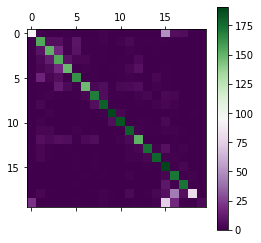

In [25]:
plt.matshow(cm, cmap=plt.cm.PRGn)
plt.colorbar()

In [26]:
accuracy_score(Y_test, cls.predict(X_test))

0.8663129973474801